## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

from scipy.stats import zscore
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
data = pd.read_csv("C:/Users/afroz.shaikh/Downloads/Bank_Modelling.csv")
data.columns = ["ID","Age","Experience","Income",
                "ZIPCode","Family","CCAvg","Education",
                "Mortgage","PersonalLoan","SecuritiesAccount","CDAccount",
                "Online","CreditCard"]

In [ ]:
dataset = pd.DataFrame(data)
dataset.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.shape

(5000, 14)

In [ ]:
dataset.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Detecting the Null values in the dataset

Based on the below result we can say that there are no null values found in the dataset

In [ ]:
dataset.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
dataset['PersonalLoan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: PersonalLoan, dtype: float64

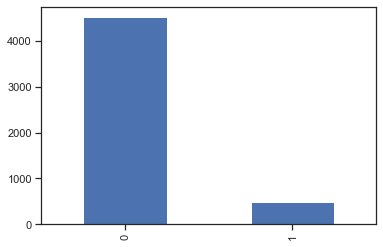

In [ ]:
pd.value_counts(dataset["PersonalLoan"]).plot(kind="bar")

{'whiskers': [<matplotlib.lines.Line2D at 0xdf528f0>,
 'caps': [<matplotlib.lines.Line2D at 0xdf52f10>,
 'boxes': [<matplotlib.lines.Line2D at 0xdf528d0>],
 'medians': [<matplotlib.lines.Line2D at 0xdf60710>],
 'fliers': [<matplotlib.lines.Line2D at 0xdf60950>],
 'means': []}

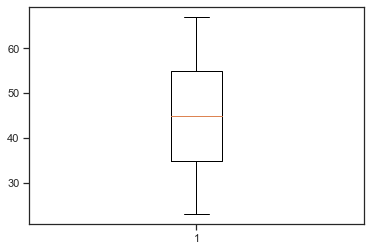

In [ ]:
plot.boxplot(dataset['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0xdf93730>,
 'caps': [<matplotlib.lines.Line2D at 0xdf93d70>,
 'boxes': [<matplotlib.lines.Line2D at 0xdf93710>],
 'medians': [<matplotlib.lines.Line2D at 0xdf9f570>],
 'fliers': [<matplotlib.lines.Line2D at 0xdf9f7b0>],
 'means': []}

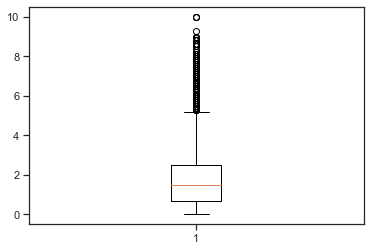

In [ ]:
plot.boxplot(dataset['CCAvg'])

{'whiskers': [<matplotlib.lines.Line2D at 0xdfceb10>,
 'caps': [<matplotlib.lines.Line2D at 0xdfdb3f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xdfceaf0>],
 'medians': [<matplotlib.lines.Line2D at 0xdfdb950>],
 'fliers': [<matplotlib.lines.Line2D at 0xdfdbb90>],
 'means': []}

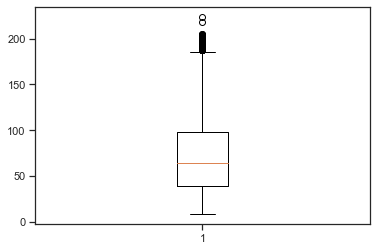

In [ ]:
plot.boxplot(dataset['Income'])

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

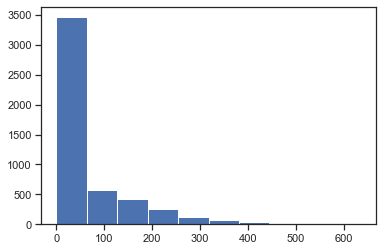

In [ ]:
plot.hist(dataset['Mortgage'])

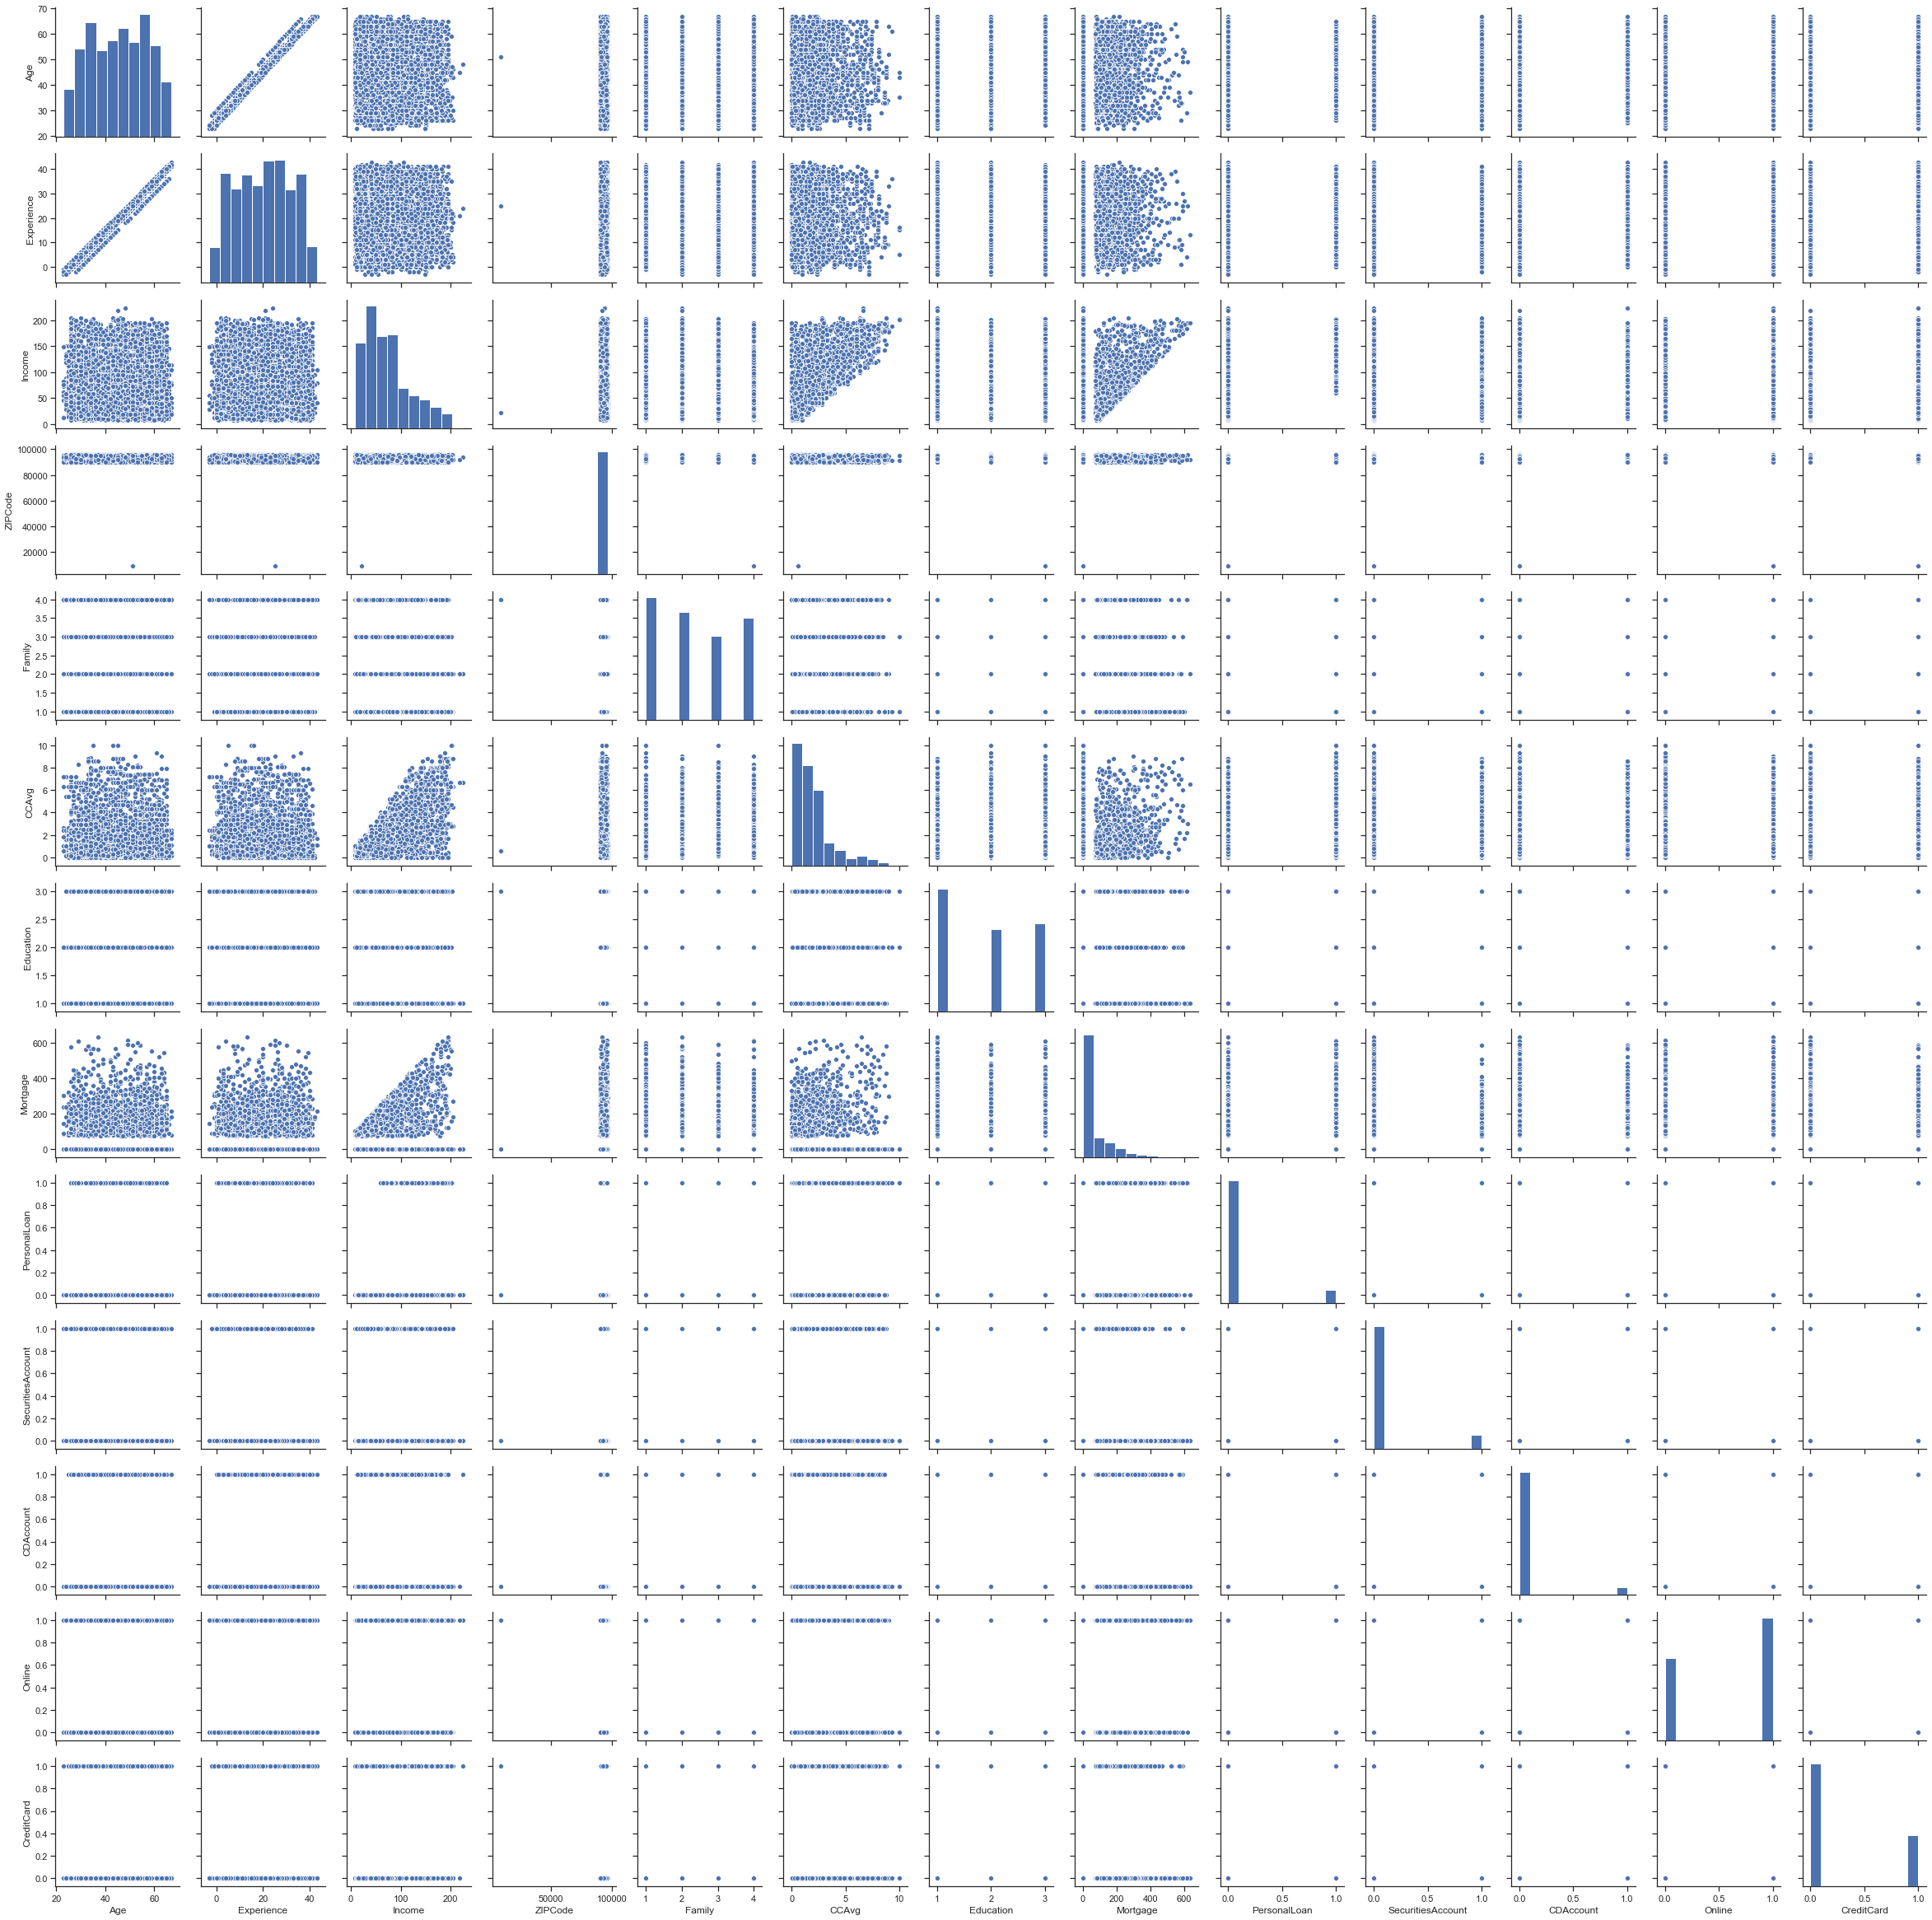

In [ ]:
sns.pairplot(data.iloc[:,1:])

### Data Distribution

#### Based on the above pair plot and the dataset below are the findings
- **Age**: Most of customers fall under the age of 30 years to 60 years. This can be presumed by looking at the statistics above which shows mean is almost equal to median.
- **Experience**: Most of the customers have experience starting from tenure of 8 years. Even this can be analyzed by looking at the similarity between mean and the median values. Also, as per the describe statement we can see negative values in Experience column which is quite unlikely as Experience cannot be marked in a negative. We can either delete these negative values or replace them with a median values to normalize the data
- **Income**: Here we can say that majority of the customers have income ranging between 45k to 70k. This can be concluded based on the difference between Mean and Median values (Mean>Median) i.e. Income has positively skewed frequency distribution
- **CCAvg**: Also, CCAvg has positively skewed frequency distribution. (Mean>Median). Customers have an average spendings ranging between 0k to 10k and majority of spendings are below 2.5k
- **Mortgage**: Most of the customers have a Mortgage below an approx of 60k.
- Columns for Family and education shows categorical data and is evenly distributed.

### Normalizing the data
As seen previously we had found a few negative values in the Experience column which is not ideal to have in a dataset. Therefore we need to clean this data and replace the values with a median of the type values

In [ ]:
data[data['Experience'] < 0]['Experience'].count()

52

In [ ]:
datasetExp = data.loc[data['Experience'] >0]
negativeExp = data.Experience < 0
column_name = 'Experience'
negdata = data.loc[negativeExp]['ID'].tolist()

In [ ]:
negativeExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
for id in negdata:
    age = data.loc[np.where(data['ID'] == id)]['Age'].tolist()[0] # this will get the value of age column
    education = data.loc[np.where(data['ID'] == id)]['Education'].tolist()[0] # this will get the value of age column
    dataset_filter = datasetExp[(datasetExp.Age == age) & (datasetExp.Education == education)] # Defining a filter to get the median of values for
    exp = dataset_filter['Experience'].median() # Fetching the median of the filtered data for experience column
    data.loc[data.loc[np.where(data['ID'] == id)].index, 'Experience'] = exp

Verify if the data modified is accurate and if there are any negative values in the dataset

In [ ]:
data[data['Experience'] < 0]['Experience'].count()

0

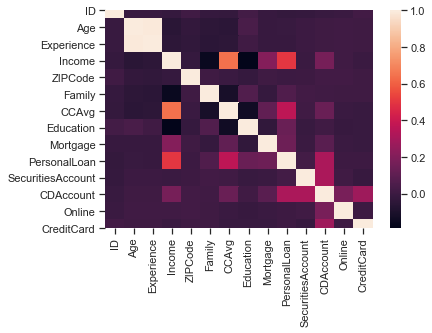

In [ ]:
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool))

### Getting the target column distribution and the factors that the target columns is affected by

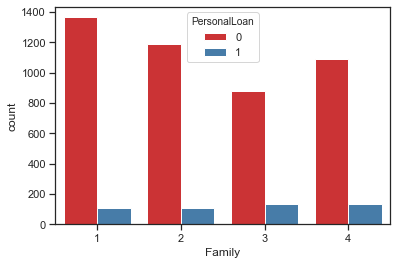

In [ ]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

Family doesn't have major impact on the availing the Personal Loan

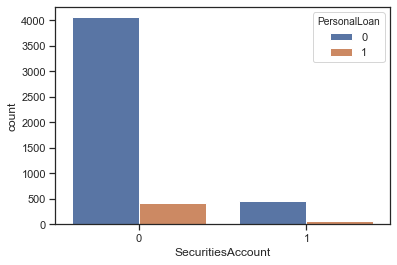

In [ ]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

This graph shows that the Customer who do not have any Securities Account have availed for loan more than the one's with a Security account

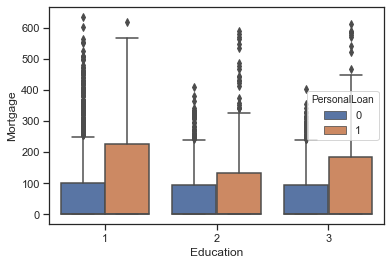

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data)

Here the graph shows that Customers availing for Personal Loan have high Mortgage 

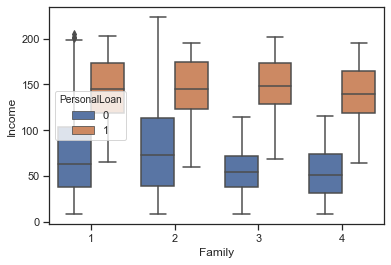

In [ ]:
sns.boxplot(x="Family", y='Income', hue="PersonalLoan", data=data)

Based on the above Boxplot, Families with an income of less than 100k are less likely to opt for a personal loan

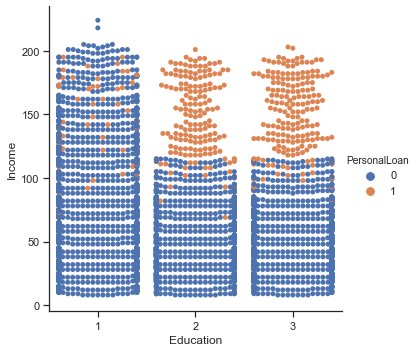

In [ ]:
sns.catplot(x='Education',y='Income',hue='PersonalLoan',data=data, kind="swarm")

Customers with educated level 1 have comparitively more income. 
Although customer availing for personal loan have the almost similar income levels

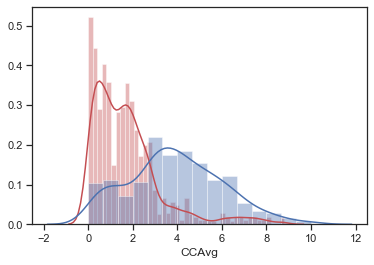

In [ ]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'b')

In [ ]:
print('Average Credit card spendings from a Non Loan Customer is: ', round(data[data.PersonalLoan == 0]['CCAvg'].mean()*1000))
print('Average Credit card spendings from a Loan Customer is: ', round(data[data.PersonalLoan == 1]['CCAvg'].mean()*1000))

Average Credit card spendings from a Non Loan Customer is:  1729.0
Average Credit card spendings from a Loan Customer is:  3905.0


In [ ]:
print('Average Credit card spendings from a Non Loan Customer is: ', round(data[data.PersonalLoan == 0]['CCAvg'].median()*1000))
print('Average Credit card spendings from a Loan Customer is: ', round(data[data.PersonalLoan == 1]['CCAvg'].median()*1000))

Average Credit card spendings from a Non Loan Customer is:  1400.0
Average Credit card spendings from a Loan Customer is:  3800.0


Data shows that Customer with higher average of Credit Card spendings (median of 3800) is likely to opt for a personal loan; 
whereas a Customer with lower average of Credit Card spendings (median of 1400) would not opt for a personal loan.

## Naive Bayes Model to predict the likelihood of a liability customer buying personal loans 

##### Splitting the data into train and test set in the ratio of 70:30 (0.3 would be test data size)

In [ ]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_train_nb, X_test_nb, Y_train_nb, Y_test_nb = train_test_split(X, Y, test_size=0.30)

In [ ]:
naive_model = GaussianNB()
naive_model.fit(X_train_nb, Y_train_nb)

prediction = naive_model.predict(X_test_nb)
NaiveBayes_Accuracy = accuracy_score(Y_test_nb,prediction)

print(NaiveBayes_Accuracy)

0.894


In [ ]:
pred_train_nb = naive_model.predict(X_train_nb)
conf_matrix_nb = confusion_matrix(Y_train_nb,pred_train_nb)

print("Confusion Matrix for Naive Bayes Model is = \n",conf_matrix_nb)

Confusion Matrix for Naive Bayes Model is = 
 [[2914  242]
 [ 136  208]]


## K-NN Model to predict the likelihood of a liability customer buying personal loans 

##### Splitting the data into train and test set in the ratio of 70:30 
therefore out of 5000 total records 70% of the train data would be around 3500 rows and 30% test data would be 1500 rows

In [ ]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

Applying the K-NN model to the train data keeping neighbors at 3 different variance

##### Checking for the accuracy of neighbors ranging between 1-100

In [ ]:
neighbor_list = list(range(1,100))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, neighbor_list))

KNN_Accuracy_Scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    # predict the response
    predicted = knn.predict(X_Test)
    # evaluate accuracy
    scores = accuracy_score(Y_Test, predicted)
    KNN_Accuracy_Scores.append(scores)

MSE = [1 - x for x in KNN_Accuracy_Scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 33


###### Keeping 33 neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 33 , weights = 'uniform')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
KNN_Accuracy_33N = accuracy_score(Y_Test, predicted)
print(KNN_Accuracy_33N)

0.9159439626417611


In [ ]:
pred_train_knn = knn.predict(X_Train)
conf_matrix_knn = confusion_matrix(Y_Train,pred_train_knn)

print("Confusion Matrix for KNN Model is = \n",conf_matrix_knn)

Confusion Matrix for KNN Model is = 
 [[3133   13]
 [ 335   19]]


## Logistic Regression Model to predict the likelihood of a liability customer buying personal loans 

##### Splitting the data into train and test set in the ratio of 70:30 
therefore out of 5000 total records 70% of the train data would be around 3500 rows and 30% test data would be 1500 rows

In [ ]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_train_set, X_test_set, Y_train_set, Y_test_set = train_test_split(X, Y, test_size=0.30)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_set, Y_train_set)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression_Accuracy = logreg.score(X_test_set, Y_test_set)
print(LogisticRegression_Accuracy)

0.902


In [ ]:
pred_train = logreg.predict(X_train_set)
conf_matrix_lr = confusion_matrix(Y_train_set,pred_train)

print("Confusion Matrix for Logistic Regression Model is = \n",conf_matrix_lr)

Confusion Matrix for Logistic Regression Model is = 
 [[3094   90]
 [ 217   99]]


### Conclusion on which is the best model in this case

In [ ]:
print('Accuracy Score for Naive Bayes Model is:', NaiveBayes_Accuracy)
print('Accuracy Score for K-NN Model is:',KNN_Accuracy_33N)
print('Accuracy Score for Logistic Regression Model is:',LogisticRegression_Accuracy)

Accuracy Score for Naive Bayes Model is: 0.894
Accuracy Score for K-NN Model is: 0.9159439626417611
Accuracy Score for Logistic Regression Model is: 0.902


###### As the above accuracy scores state, 
###### K-NN algorithm has the highest accuracy and can be used as the best fit model for our purpose. KNN is a non-parametric model which supports non Linear solutions with local approximation.
###### The aim of this was to analyze the data from previous survey conducted by banks and predict the conversion of liability Customers into loan Customers